![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Feature engineering

- In this lab, you will use `learningSet.csv` file which you have already cloned in the previous activities. 

### Instructions

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- Use appropriate methods to clean the columns `GEOCODE2`, `WEALTH1`, `ADI`, `DMA`,and `MSA`.
- Use appropriate EDA technique where ever necessary.


In [23]:
# Prepare toolbox

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../learningSet.csv')
df.shape

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(95412, 481)

In [3]:
df.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


- Check for null values in the numerical columns.

In [4]:
nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage_nulls'])
nulls.sort_values('percentage_nulls', ascending = False).head(80)

,percentage_nulls
RDATE_5,99.990567
RAMNT_5,99.990567
RDATE_3,99.746363
RAMNT_3,99.746363
RDATE_4,99.705488
...,...
ADATE_16,21.343227
ADATE_14,19.774242
ADATE_9,11.785729
ADATE_11,10.923154


- Use appropriate methods to clean the columns `GEOCODE2`, `WEALTH1`, `ADI`, `DMA`,and `MSA`.
- Use appropriate EDA technique where ever necessary.

In [9]:
cols=['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']

In [22]:
#Checking nulls and unique values in the different columns
perc_nulls=pd.DataFrame([df[col].isna().sum()*100/len(df[col]) for col in cols], index=cols, columns=['percentage_nulls'])
[print(df[col].value_counts()) for col in cols]
display(perc_nulls)

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64
9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
147.0       1
161.0       1
651.0       1
103.0       1
601.0       1
Name: ADI, Length: 204, dtype: int64
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
516.0       1
552.0       1
554.0       1
584.0       1
Name: DMA, Length: 206, dtype: int64
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
2975.0        1
9140.0        1
9280.0        1
9000.0        1
1320.0        1
Name: MSA, Length: 298, dtype: int64


,percentage_nulls
GEOCODE2,0.138347
WEALTH1,46.882992
ADI,0.138347
DMA,0.138347
MSA,0.138347


Some conclusions of this first look into the data:
1- GEOCODE2 and WEALTH1 look like categorical features. ADI, DMA and MSA are currently numerical (most likely discrete), but could be grouped in bins.

- We will first deal with WEALTH1, since it's the one with most nulls.
- Dropping the Nulls is not an option, since 47% of the data would be lost.

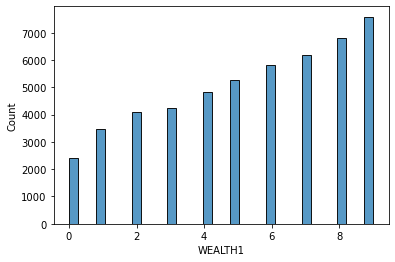

In [52]:
sns.histplot(df['WEALTH1'])
wealth1_val_counts=pd.DataFrame(df['WEALTH1'].value_counts())

The distribution is not similar to a normal distribution. This also means that it is not correct to fill the Null values with the average.

In [53]:
df['WEALTH1'].mean()
#Does not make any sense for this feature

5.345698500394633

- Check correlation with WEALTH
- If there is no correlation between this column and the target, I can drop the column.

- OPTION B: Consider everything as categorical, and the empty values as a "10th category", an empty space. It might mean something.

In [59]:
df['WEALTH1']=df['WEALTH1'].astype(str).fillna("n/a")
df['WEALTH1'].value_counts()

nan    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

<AxesSubplot:xlabel='WEALTH1', ylabel='Count'>

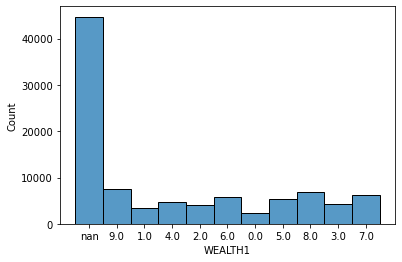

In [60]:
sns.histplot(df['WEALTH1'])

Now, the feature 'WEALTH1' is considering all the empty entries as "nan", and so it'll be used in a future model fitting.  It remains to be seen whether this consideration will or not improve the model.

In [61]:
perc_nulls=pd.DataFrame([df[col].isna().sum()*100/len(df[col]) for col in cols], index=cols, columns=['percentage_nulls'])
#[print(df[col].value_counts()) for col in cols]
display(perc_nulls)

,percentage_nulls
GEOCODE2,0.138347
WEALTH1,0.000000
ADI,0.138347
DMA,0.138347
MSA,0.138347


In [62]:
df_clean=df.copy()

In [63]:
df_clean.dropna(axis=0, how='any', subset=['GEOCODE2'],inplace=True)

In [71]:
perc_nulls=pd.DataFrame([df_clean[col].isna().sum()*100/len(df[col]) for col in cols], index=cols, columns=['percentage_nulls'])
#[print(df[col].value_counts()) for col in cols]
display(perc_nulls)
display(df_clean.shape)
print('Entries lost:', df.shape[0]-df_clean.shape[0])

,percentage_nulls
GEOCODE2,0.0
WEALTH1,0.0
ADI,0.0
DMA,0.0
MSA,0.0


(95280, 481)

Entries lost: 132


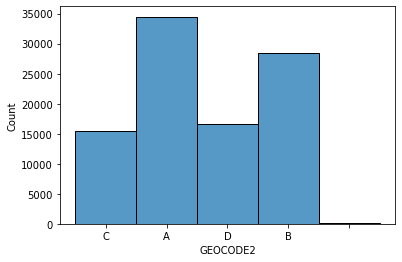

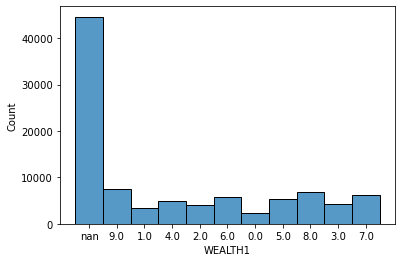

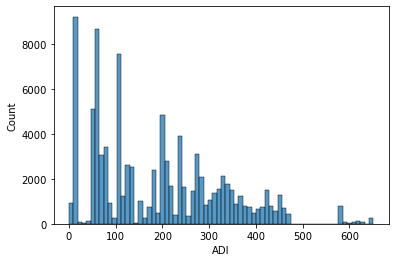

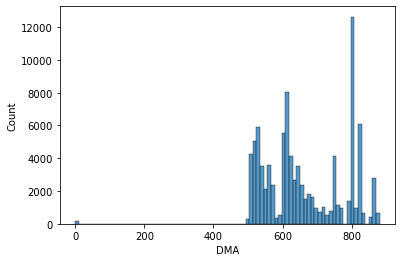

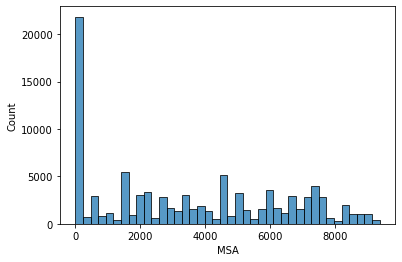

In [77]:
for col in cols:
    sns.histplot(df_clean[col])
    plt.show()